Successfully loaded image: projectImages\Day01_F_06.jpg
Measured height for projectImages\Day01_F_06.jpg: 375 pixels

Successfully loaded image: projectImages\Day02_F_06.jpg
Measured height for projectImages\Day02_F_06.jpg: 399 pixels

Successfully loaded image: projectImages\Day03_F_06.jpg
Measured height for projectImages\Day03_F_06.jpg: 371 pixels

Successfully loaded image: projectImages\Day04_F_06.jpg
Measured height for projectImages\Day04_F_06.jpg: 369 pixels

Successfully loaded image: projectImages\Day05_F_06.jpg
Measured height for projectImages\Day05_F_06.jpg: 420 pixels

Successfully loaded image: projectImages\Day06_F_06.jpg
Measured height for projectImages\Day06_F_06.jpg: 464 pixels

Successfully loaded image: projectImages\Day07_F_06.jpg
Measured height for projectImages\Day07_F_06.jpg: 463 pixels

Successfully loaded image: projectImages\Day08_F_06.jpg
Measured height for projectImages\Day08_F_06.jpg: 457 pixels

Successfully loaded image: projectImages\Day09_F_06.jpg


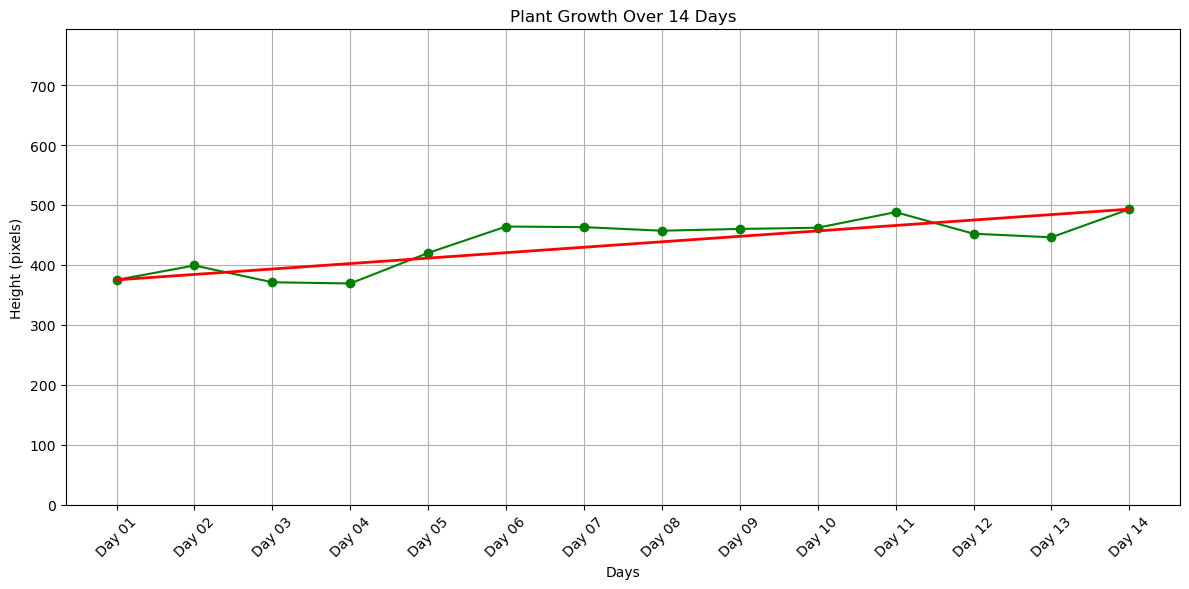

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def enhanceImage(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #BGR to HSV
    
    lowerColor = np.array([40, 40, 40])
    upperColor = np.array([100, 255, 255])

    
    mask = cv2.inRange(hsv, lowerColor, upperColor)

    blurredMask = cv2.GaussianBlur(mask, (5, 5), 0)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) #Structuring element 
    closedMask = cv2.morphologyEx(blurredMask, cv2.MORPH_CLOSE, kernel) #closing
    openedMask = cv2.morphologyEx(closedMask, cv2.MORPH_OPEN, kernel) #opening 

    return openedMask

def measurePlantHeight(imagePath, outputFolder):
    img = cv2.imread(imagePath)
    if img is None:
        print(f"Error loading image: {imagePath}")
        return 0
    else:
        print(f"Successfully loaded image: {imagePath}")
        
    mask = enhanceImage(img)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Find contours
    
    if contours:
        filteredContours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100] #Filter out small contours
        if filteredContours:
            largestContour = max(filteredContours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largestContour) #Bounding box around the detected plant
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) #Draw the bounding box
            heightPixels = h
            
            print(f"Measured height for {imagePath}: {heightPixels} pixels\n")
            outputFilename = os.path.join(outputFolder, os.path.basename(imagePath))
            cv2.imwrite(outputFilename, img)
            return heightPixels
    print(f"No contours found for {imagePath}")
    return 0 

def main(folderPath, outputFolder):
    heights = []
    xLabels = [] 

    os.makedirs(outputFolder, exist_ok=True)

    for day in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']:
        for time in ['06']:
            filename = f'Day{day}_F_{time}.jpg'  
            imgPath = os.path.join(folderPath, filename)
            height = measurePlantHeight(imgPath, outputFolder)
            heights.append(height)
            xLabels.append(f'Day {day}')

    xAxis = list(range(len(xLabels))) 

    plt.figure(figsize=(12, 6))
    plt.plot(xAxis, heights, marker='o', linestyle='-', color='green')
    plt.title('Plant Growth Over 14 Days')
    plt.xlabel('Days')
    plt.ylabel('Height (pixels)')
    plt.xticks(xAxis, xLabels, rotation=45)  
    
    if heights:
        maxHeight = max(heights) + 300
    else:
        maxHeight = 750

    plt.ylim(0, maxHeight)
    
    plt.grid()

    if heights:  #Draw a red line connecting first and last points
        plt.plot([xAxis[0], xAxis[-1]], [heights[0], heights[-1]], color='red', linestyle='-', linewidth=2)

    plt.tight_layout()  
    plt.show()

if __name__ == "__main__": 
    folderPath = 'projectImages'
    outputFolder = 'detectedContours'  
    main(folderPath, outputFolder)